# Airbnb Seattle data analysis - neighborhoods

## Introduction
The dataset consists of two files, one containing Airbnb listings from Seattle, WA in the United States, and one file containing reviews of these listings. The data was downloaded from [Kaggle](https://www.kaggle.com/airbnb/seattle).

The listings data consists of approx. 3.800 rows, while the reviews data contains close to 85.000 reviews.

In this notebook I will be exploring how the neighborhoods of Seattle differ in terms of the price of the listings. Furthermore, I will look at reviews and listing descriptions to see what separates the most and least expensive neighborhoods through use of word clouds.

I will attempt to answer the following questions:
#### What are the most and least expensive neighborhoods in Seattle to rent?
#### How do reviews of these neighborhoods differ?
#### How do listing descriptions for these neighborhoods differ?

## Gathering data

In [1]:
# Import packages and data files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

## Assessing data
A quick visual assessment of the data

In [2]:
listings.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview        ...         \
0                                                NaN        ...          
1  Queen Anne is a wonderful, truly functional vi...        ...          
2  Upper Queen Anne is a charming neighborhood fu...        ...          
3                                                NaN        ...          
4  We are in the beautiful neighborhood of Queen ...        ...          

  review_scores_value requires_license license jurisdiction_names  \
0                10.0                f     NaN         WASHINGTON   
1                10.0                f     NaN         WASHINGTON   
2                10.0                f     NaN         WASHINGTON   
3                 NaN                f     NaN         WASHINGTON   
4                 9.0                f     NaN         WASHINGTON   

  instant_bookable cancellation_policy  require_guest_profile_picture  \
0                f            moderate                              f   
1                f              strict                              t   
2                f              strict                              f   
3                f            flexible                              f   
4                f              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [35]:
listings[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
          'review_scores_communication', 'review_scores_location', 'review_scores_value']].describe()

review_scores_rating  review_scores_accuracy  \
count           3171.000000             3160.000000   
mean              94.539262                9.636392   
std                6.606083                0.698031   
min               20.000000                2.000000   
25%               93.000000                9.000000   
50%               96.000000               10.000000   
75%               99.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                3165.000000            3160.000000   
mean                    9.556398               9.786709   
std                     0.797274               0.595499   
min                     3.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                  3167.000000             3163.000000   
mean                      9.809599                9.608916   
std                       0.568211                0.629053   
min                       2.000000                4.000000   
25%                      10.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  
count          3162.000000  
mean              9.452245  
std               0.750259  
min               2.000000  
25%               9.000000  
50%              10.000000  
75%              10.000000  
max              10.000000

In [4]:
reviews.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84832 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


## Data cleaning
The dataset is already quite clean and tidy, but some cleaning is necessary. I will need to take the following steps:
- Drop unnecessary columns
- Change datatype of `price` and `extra_people` variables from object to float
- Fix erroneous values from `guests_included` column
- Drop rows from `reviews` data that doesn't contain a review text

##### Drop unnecessary columns
There are a lot of columns in the listings data, most of which are not useful to me. I will drop the columns that I definitely know that I won't need to answer my questions.

In [6]:
# Choose which columns to keep in the dataset
columns = ['id', 'description', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
           'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'guests_included', 'extra_people']

In [7]:
#Create new dataframe with only the columns defined in the above list
col_drop = []
for col in listings.columns:
    if col not in columns:
        col_drop.append(col)
    else:
        continue

listings_df = listings.drop(col_drop, axis=1)

##### Change datatype of `price` and `extra_people` variables from object to float
The columns with dollar values are formatted as strings with a \$ in front of the number and a comma as the thousands separator. I need to remove the $ and the comma and then convert to float.

In [8]:
#Function to convert string formatted dollar values into float
def price_to_float(df, col):
    df[col] = df[col].str.replace(',','').str.replace('$','').astype(float)

price_to_float(listings_df, 'price')
price_to_float(listings_df, 'extra_people')

##### Fix "missing" values from `guests_included` column
The `guests_included` column contain 92 zero values, but not Null values. As it's highly unlikely that there are listings which have no guests included, I feel confident that I can fill these rows with the value from the `accommodates` column. The difference between `guests_included` and `accommodates` is in most cases small, so even though this will create a some small errors in the `guests_included` columns, I feel confident it will not significantly reduce the quality of the data.

There are also 22 cases where `guests_included` is higher than `accommodates`, which doesn't make sense. I will replace the value in `guests_included` with the value from `accommodates`

The reason for including and cleaning the `guests_included` column is that I want to create a new feature that shows price per guest included.

In [9]:
len(listings_df[listings_df['guests_included']==0])

92

In [10]:
len(listings_df[listings_df['guests_included'] > listings_df['accommodates']])

22

In [11]:
diff = listings_df['accommodates'] - listings_df['guests_included']
diff.describe()

count    3818.000000
mean        1.676794
std         1.693208
min       -13.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        13.000000
dtype: float64

In [12]:
#If guests_included column is 0, replace with value from accommodates column
listings_df['guests_included'] = np.where(listings_df['guests_included'] == 0, listings_df['accommodates'], listings_df['guests_included'])
listings_df['guests_included'] = np.where(listings_df['guests_included'] > listings_df['accommodates'], listings_df['accommodates'], listings_df['guests_included'])

In [13]:
#Create new columns with price per guest
listings_df['price_per_guest'] = listings_df['price'] / listings_df['guests_included']

In [14]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
id                        3818 non-null int64
description               3818 non-null object
neighbourhood_cleansed    3818 non-null object
property_type             3817 non-null object
room_type                 3818 non-null object
accommodates              3818 non-null int64
bathrooms                 3802 non-null float64
bedrooms                  3812 non-null float64
beds                      3817 non-null float64
bed_type                  3818 non-null object
amenities                 3818 non-null object
price                     3818 non-null float64
guests_included           3818 non-null int64
extra_people              3818 non-null float64
price_per_guest           3818 non-null float64
dtypes: float64(6), int64(3), object(6)
memory usage: 447.5+ KB


In [15]:
reviews_df = reviews.dropna()

In [16]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84832 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84832 non-null int64
id               84832 non-null int64
date             84832 non-null object
reviewer_id      84832 non-null int64
reviewer_name    84832 non-null object
comments         84832 non-null object
dtypes: int64(3), object(3)
memory usage: 4.5+ MB


## Data analysis and visualization
Before diving into the questions, I just quickly want to look at the distribution of price in the dataset. This will give me a context for looking at the prices per neighborhood.

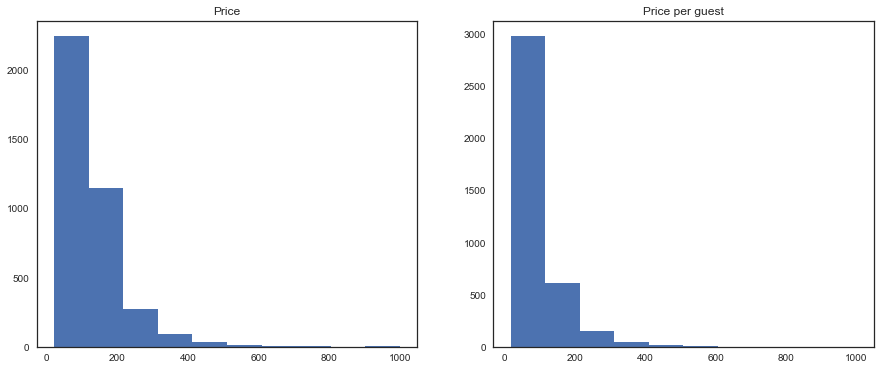

In [17]:
plt.figure(figsize=[15,6])

plt.subplot(1,2,1)
plt.hist(listings_df['price'])
plt.title('Price');

plt.subplot(1,2,2)
plt.hist(listings_df['price_per_guest'])
plt.title('Price per guest');

The distribution of the price is heavily right skewed with a long tail, which indicates that it would be more appropriate to perform a scale transformation into log scale.

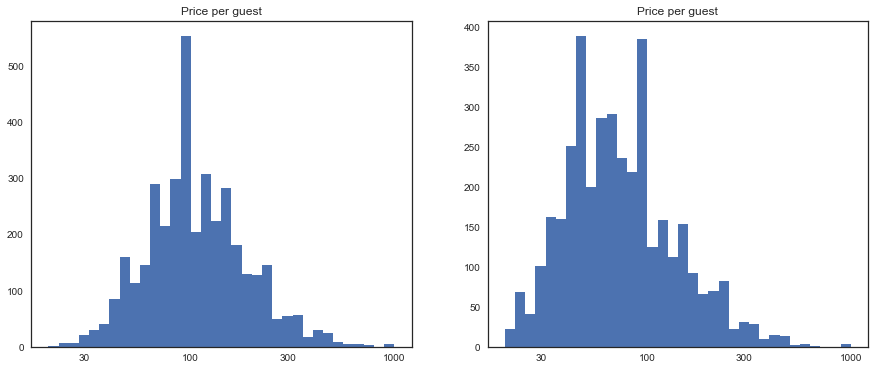

In [18]:
# Apply a log transform to the histogram
bins = 10 ** np.arange(1.3, np.log10(listings_df['price'].max()+0.05), 0.05)
ticks = [30, 100, 300, 1000]
labels = [30, 100, 300, 1000]

plt.figure(figsize=[15,6])

bins = 10 ** np.arange(1.3, np.log10(listings_df['price'].max()+0.05), 0.05)
ticks = [30, 100, 300, 1000]
labels = [30, 100, 300, 1000]
plt.subplot(1,2,1)
plt.hist(data=listings_df, x='price', bins=bins)
plt.xscale('log')
plt.title('Price per guest')
plt.xticks(ticks, labels);

bins = 10 ** np.arange(1.3, np.log10(listings_df['price_per_guest'].max()+0.05), 0.05)
ticks = [30, 100, 300, 1000]
labels = [30, 100, 300, 1000]
plt.subplot(1,2,2)
plt.hist(data=listings_df, x='price_per_guest', bins=bins)
plt.xscale('log')
plt.title('Price per guest')
plt.xticks(ticks, labels);

Using a log scale, we can see that the price is more or less normally distributed, with a large peak at around 100 dollars. The price per guest is slightly more right skewed, and has two peaks, one around 50 dollars and one around 100 dollars

#### What are the most and least expensive neighborhoods in Seattle to rent?

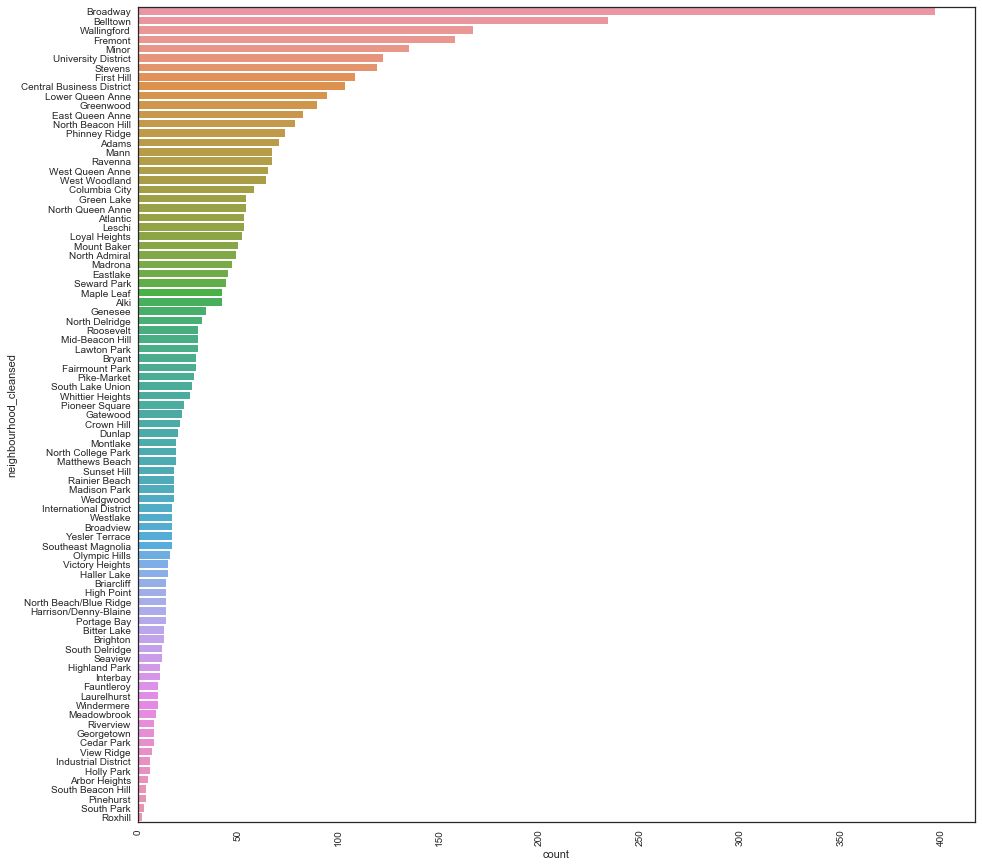

In [19]:
# Bar chart with the count of each neighborhood in the listings data
plt.figure(figsize=[15,15])
sns.countplot(data=listings_df, y='neighbourhood_cleansed', order=listings_df['neighbourhood_cleansed'].value_counts().index)
plt.xticks(rotation=90);

There are a lot of neighborhoods in the dataset, and many of them have quite few listings. Due to small sample sizes, it would be problematic to include the mean listing price for neighborhoods with few listings, so I will include only neighborhoods with at least 20 listings in the dataset.

In [20]:
#Get list of neighborhoods that have at least 20 listings in the data
neighborhoods = (listings_df['neighbourhood_cleansed'].value_counts() >= 20).to_frame().query('neighbourhood_cleansed == True').index

#Make a new dataframe with only the neighborhoods with at least 20 listings
listings_df2 = listings_df[listings_df['neighbourhood_cleansed'].isin(neighborhoods)]

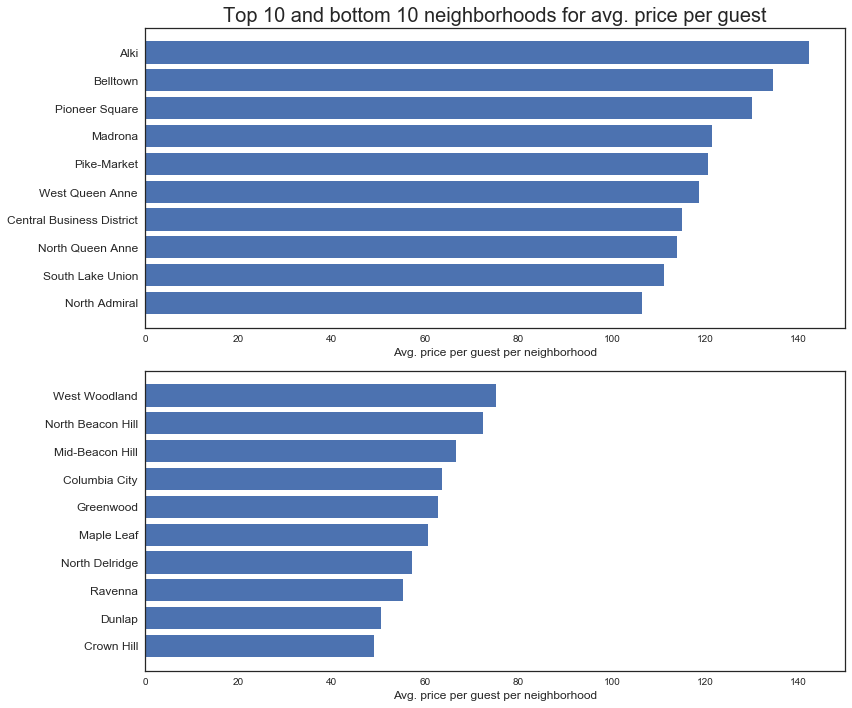

In [33]:
top_neighborhoods = listings_df2.groupby('neighbourhood_cleansed').mean()['price_per_guest'].nlargest(10).index
top_neighborhoods_val = listings_df2.groupby('neighbourhood_cleansed').mean()['price_per_guest'].nlargest(10).values
bottom_neighborhoods = listings_df2.groupby('neighbourhood_cleansed').mean()['price_per_guest'].nsmallest(10).index
bottom_neighborhoods_val = listings_df2.groupby('neighbourhood_cleansed').mean()['price_per_guest'].nsmallest(10).values
location = np.arange(len(top_neighborhoods))

plt.figure(figsize=[12,10])

plt.subplot(2,1,1)
plt.barh(location, top_neighborhoods_val, tick_label=top_neighborhoods)
plt.xlabel('Avg. price per guest per neighborhood', fontsize=12)
plt.xlim([0,150])
plt.yticks(fontsize=12)
plt.title('Top 10 and bottom 10 neighborhoods for avg. price per guest', fontsize=20)
plt.gca().invert_yaxis();

plt.subplot(2,1,2)
plt.barh(location, bottom_neighborhoods_val, tick_label=bottom_neighborhoods)
plt.xlabel('Avg. price per guest per neighborhood', fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0,150])
#plt.gca().invert_xaxis();

plt.tight_layout()
plt.show()

There is a bit of a gap in average price per guest between the top and bottom neighborhoods. The top 10 are from about 105 dollars and up, while the bottom 10 are all below about 75 dollars. This indicates that the neighborhood your property is located in will influence the price you can set for your listing.

#### How do reviews of these neighborhoods differ?
I want to look at the reviews for listings in these two groups of neighborhoods to see if there is any marked difference in what the reviewers are writing. To do that I will generate word clouds based on reviews for all the listings in the top 10 and bottom 10 neighborhoods. The review scores of all listings are so consistently high (9.5 or more out of 10 for all categories) so the numbers themselves will probably not provide useful insight.

In [22]:
# Create lists of the id's of the listings in the top 10 and bottom 10 neighborhoods
top10_id = listings_df[listings_df['neighbourhood_cleansed'].isin(top_neighborhoods)]['id'].values
bottom10_id = listings_df[listings_df['neighbourhood_cleansed'].isin(bottom_neighborhoods)]['id'].values

In [23]:
# Gather all the reviews for the top 10 neighborhoods and join together
reviews_top10 = reviews_df[reviews_df['listing_id'].isin(top10_id)]['comments'].values
reviews_top10 = "".join(review for review in reviews_top10)

In [24]:
# Import wordcloud package and define stopwords. Some stop words have been added after experimenting with the word clouds and
# identifying words that feature heavily but don't give any useful information about the listing
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(['Seattle', 'place', 'room', 'apartment', 'stay', 'building', 'house', 'condo', 'home', 'city', 'Airbnb',
                  'property', 'although', 'will', 'etc', 'Lauren', 'great', 'guest', 'guests', 'unit', 'bedroom', 'bathroom',
                  'kitchen', 'one', 'block'])

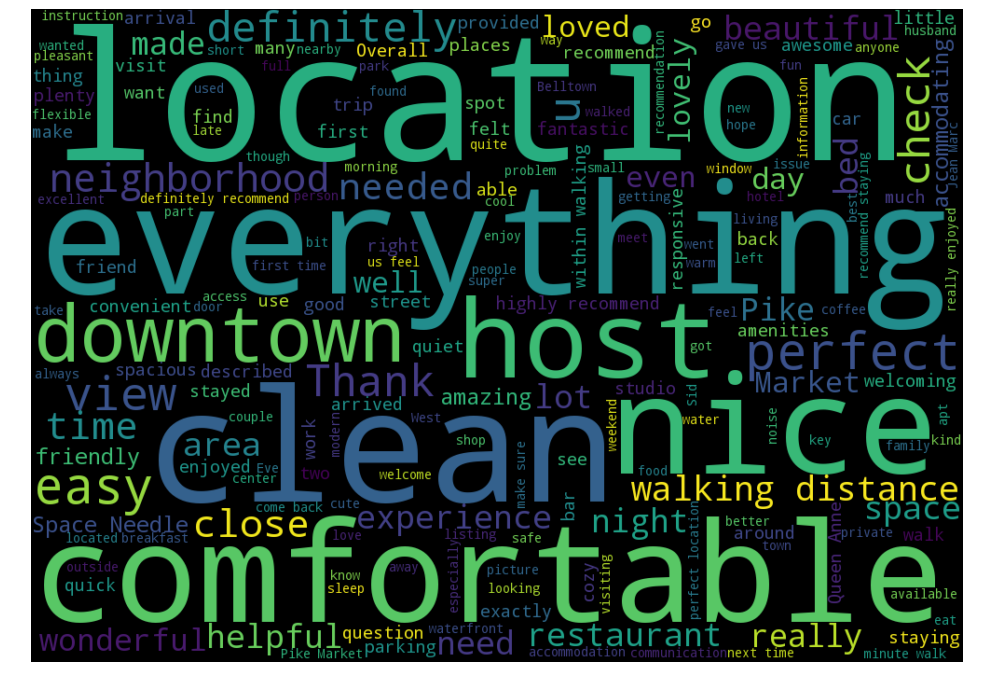

In [25]:
# Create word cloud
wordcloud = WordCloud(width = 1000, height = 700, stopwords=stopwords).generate(reviews_top10)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [26]:
reviews_bottom10 = reviews_df[reviews_df['listing_id'].isin(bottom10_id)]['comments'].values
reviews_bottom10 = "".join(review for review in reviews_bottom10)

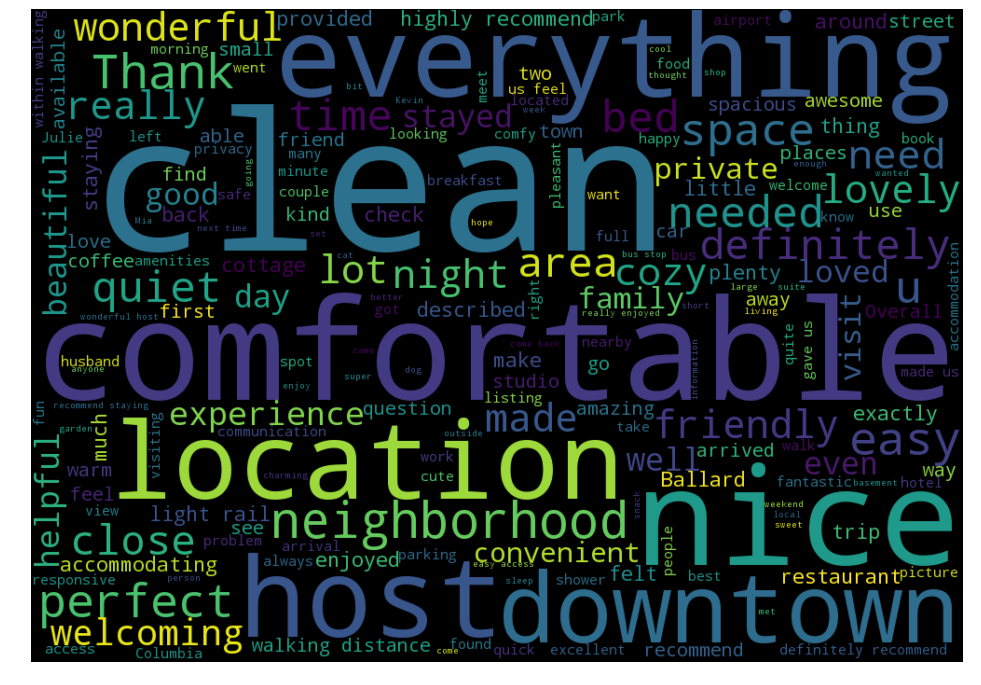

In [27]:
wordcloud = WordCloud(width = 1000, height = 700, stopwords=stopwords).generate(reviews_bottom10)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

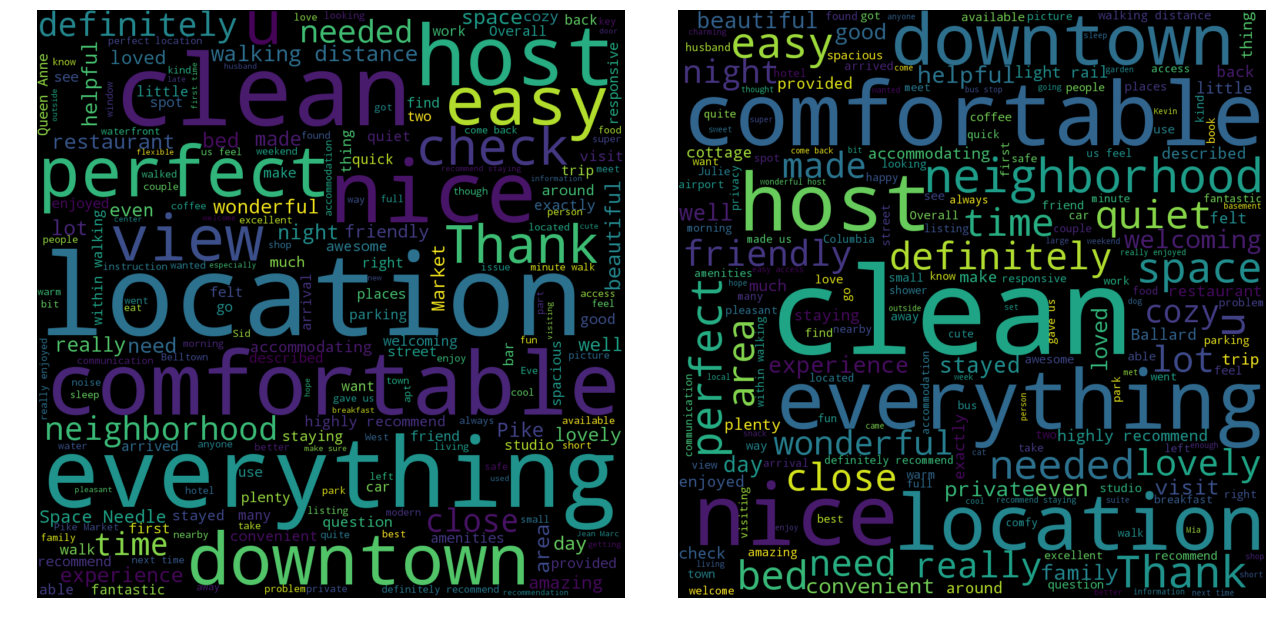

In [47]:
plt.figure(figsize=(18,12))

plt.subplot(1,2,1)
wordcloud1 = WordCloud(width = 1000, height = 1000, stopwords=stopwords).generate(reviews_top10)
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis("off");

plt.subplot(1,2,2)
wordcloud2 = WordCloud(width = 1000, height = 1000, stopwords=stopwords).generate(reviews_bottom10)
plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis("off");

plt.tight_layout()

Looking at the word clouds from reviews of listings in the top 10 and the bottom 10 neighborhoods in terms of average price, they seem more similar than I expected. Cleanliness seems to be very important to guests. Most reviewers seem to be comfortable staying in Airbnb properties, regardless of neighborhood.

The one thing that does seem to stand out is the word 'location'. While it does appear quite a bit in the bottom 10 neighborhoods, it is one of the absolute most frequent words in reviews of the top 10 neighborhood listings. This could indicate that location is an important factor for setting a price for a listing, and an important aspect of guest satisfaction.

To explore this a bit further, I'd like to look at word clouds of the listing descriptions for the top and bottom 10 neighborhoods.

In [28]:
desc_top10 = listings_df[listings_df['neighbourhood_cleansed'].isin(top_neighborhoods)]['description'].values
desc_top10 = "".join(desc for desc in desc_top10)

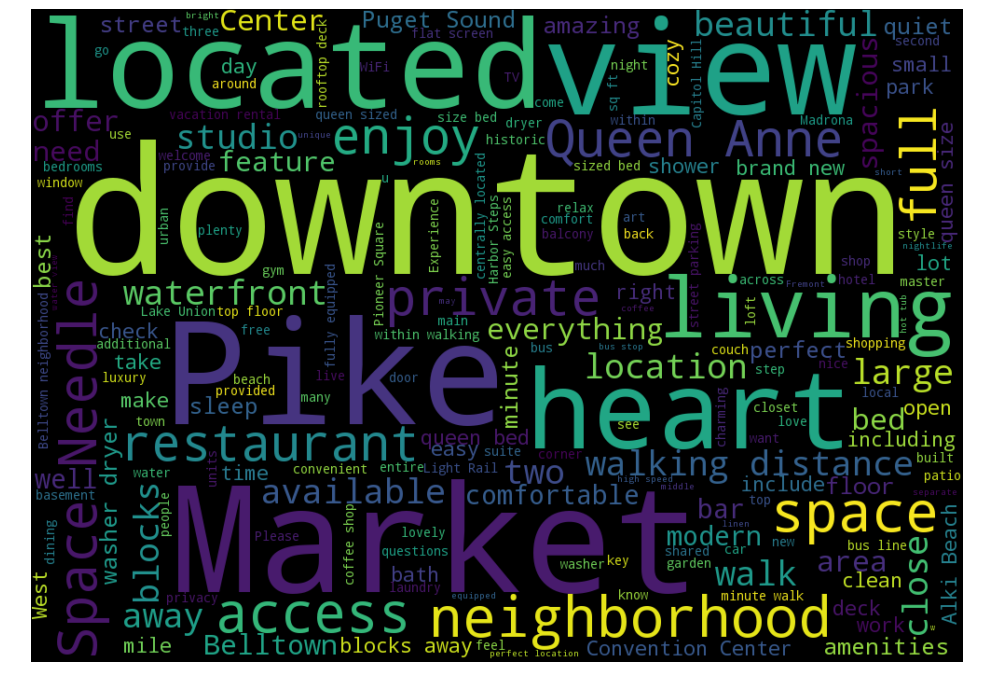

In [29]:
wordcloud = WordCloud(width = 1000, height = 700, stopwords=stopwords).generate(desc_top10)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [30]:
desc_bottom10 = listings_df[listings_df['neighbourhood_cleansed'].isin(bottom_neighborhoods)]['description'].values
desc_bottom10 = "".join(desc for desc in desc_bottom10)

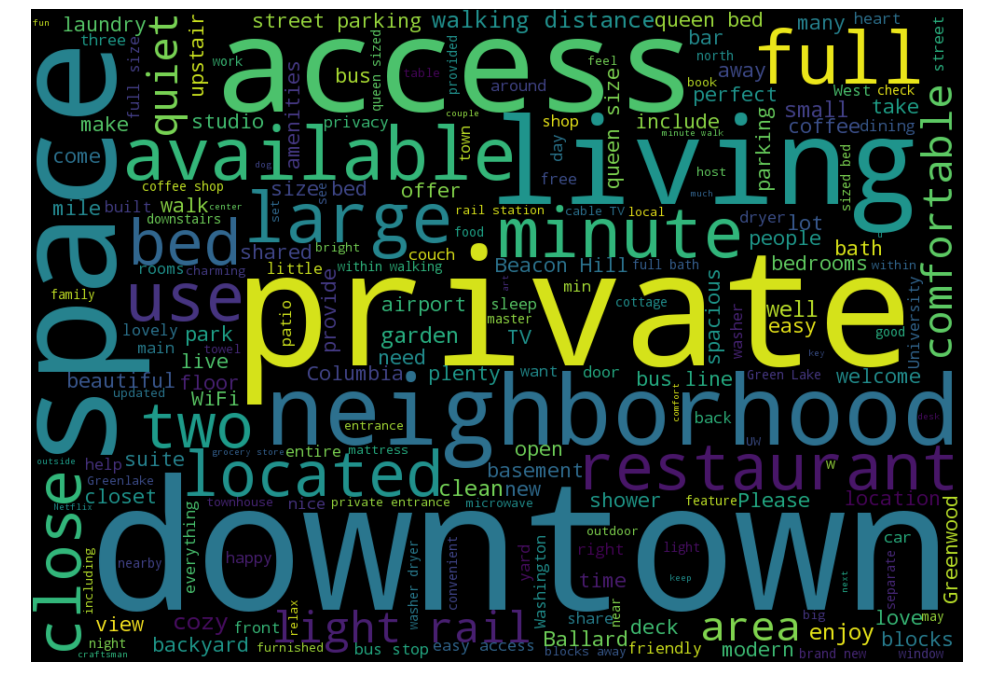

In [31]:
wordcloud = WordCloud(width = 1000, height = 700, stopwords=stopwords).generate(desc_bottom10)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

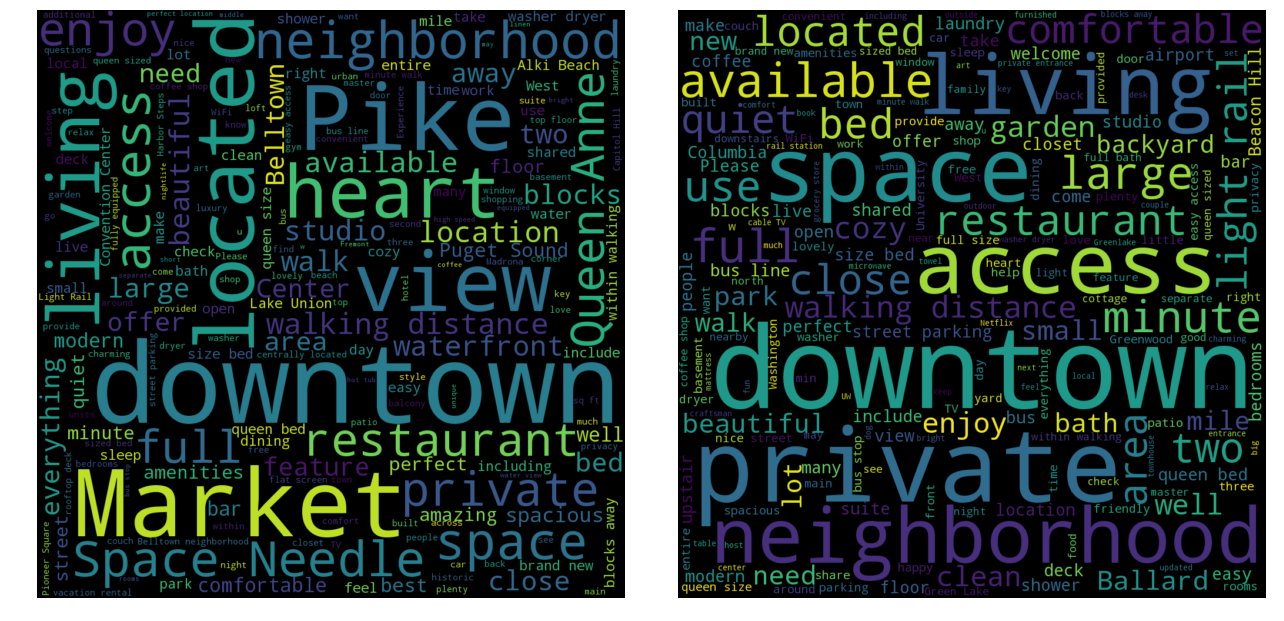

In [48]:
plt.figure(figsize=(18,12))

plt.subplot(1,2,1)
wordcloud1 = WordCloud(width = 1000, height = 1000, stopwords=stopwords).generate(desc_top10)
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis("off");

plt.subplot(1,2,2)
wordcloud2 = WordCloud(width = 1000, height = 1000, stopwords=stopwords).generate(desc_bottom10)
plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis("off");

plt.tight_layout()

Looking at these two word clouds, the difference becomes clearer. The listing descriptions of the top 10 neighborhoods use the neighborhoods themselves and the location as a selling point, with neighborhood names and landmarks showing up prominently in the word cloud, as well as other words that refer to location, such as 'heart', . In general, these seem to focus more on the surroundings than on the property itself.

The descriptions of the bottom neighborhoods give a different impression. Here the focus is on the property itself, with words describing the contents and features of the property appearing more prominently.

These word clouds show more firmly that location is an important factor in determining the listing price, and that owners are actively using the location as a key selling point for their property.